<a href="https://colab.research.google.com/github/apoorvareddy612/Data-Science-Tasks/blob/main/Student_Job_Salary_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
data = pd.read_csv('datasets_596958_1073629_Placement_Data_Full_Class.csv')


In [ ]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
#remove Serial Number

In [ ]:
data.drop("sl_no",axis=1,inplace=True)

### EDA

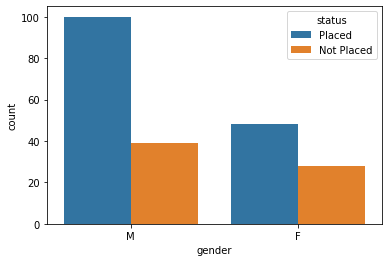

In [ ]:
sns.countplot("gender", hue="status", data=data)
plt.show()


/Users/apoorva/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/apoorva/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


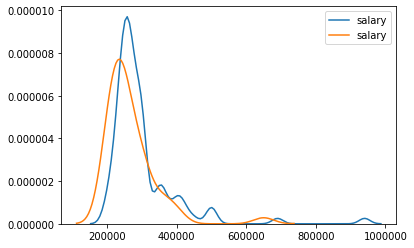

In [ ]:
sns.kdeplot(data.salary[ data.gender=="M"])
sns.kdeplot(data.salary[ data.gender=="F"])
plt.show()

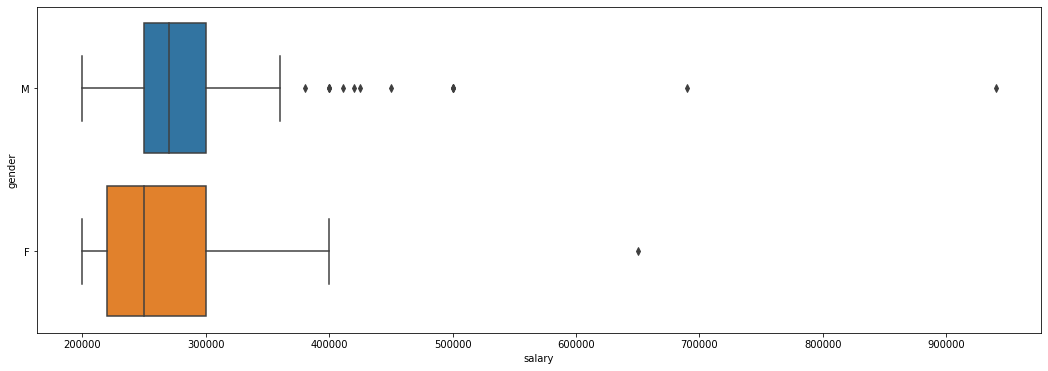

In [ ]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "gender", data=data)
plt.show()

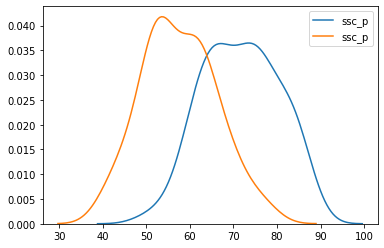

In [ ]:
sns.kdeplot(data.ssc_p[ data.status=="Placed"])
sns.kdeplot(data.ssc_p[ data.status=="Not Placed"])

plt.show()

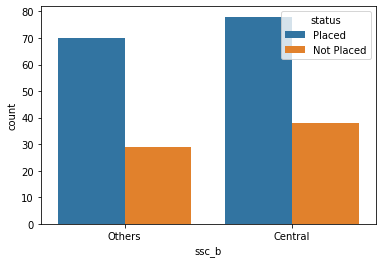

In [ ]:
sns.countplot("ssc_b", hue="status", data=data)
plt.show()

ssc_b does not affect the dependent variable very much

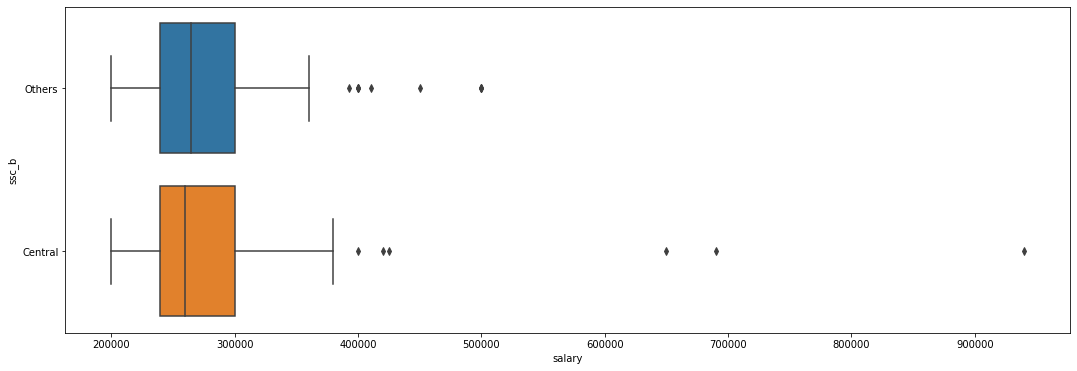

In [ ]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "ssc_b", data=data)
plt.show()

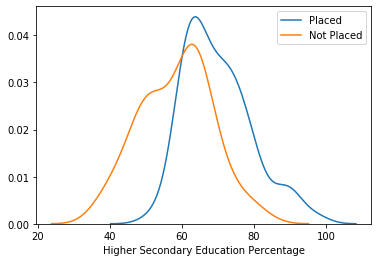

In [ ]:
sns.kdeplot(data.hsc_p[ data.status=="Placed"])
sns.kdeplot(data.hsc_p[ data.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Higher Secondary Education Percentage")
plt.show()


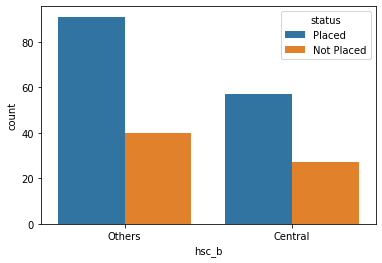

In [ ]:
sns.countplot("hsc_b", hue="status", data=data)
plt.show()

hsc_b does not affect the predicting variable

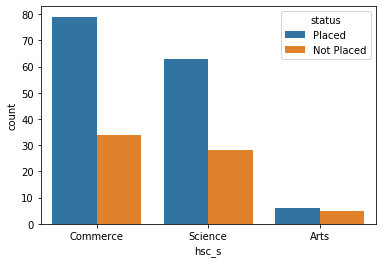

In [ ]:
sns.countplot("hsc_s", hue="status", data=data)
plt.show()

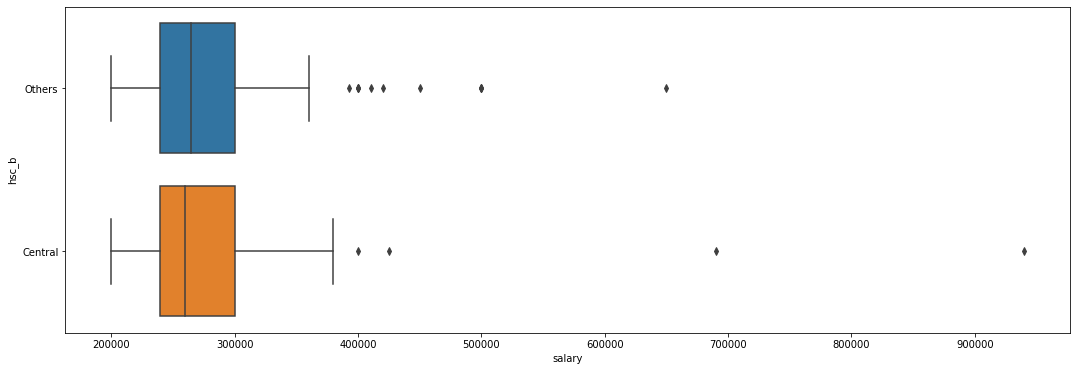

In [ ]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "hsc_b", data=data)
plt.show()

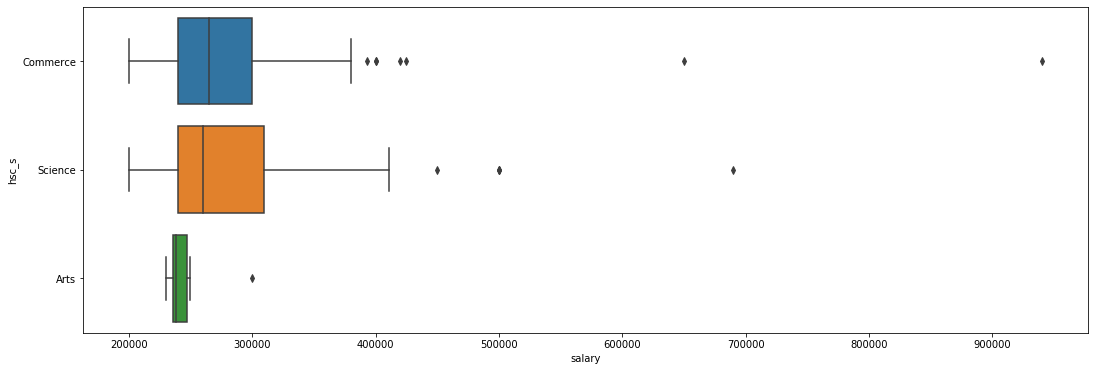

In [ ]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "hsc_s", data=data)
plt.show()

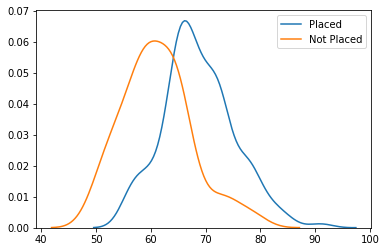

In [ ]:
sns.kdeplot(data.degree_p[ data.status=="Placed"])
sns.kdeplot(data.degree_p[ data.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.show()

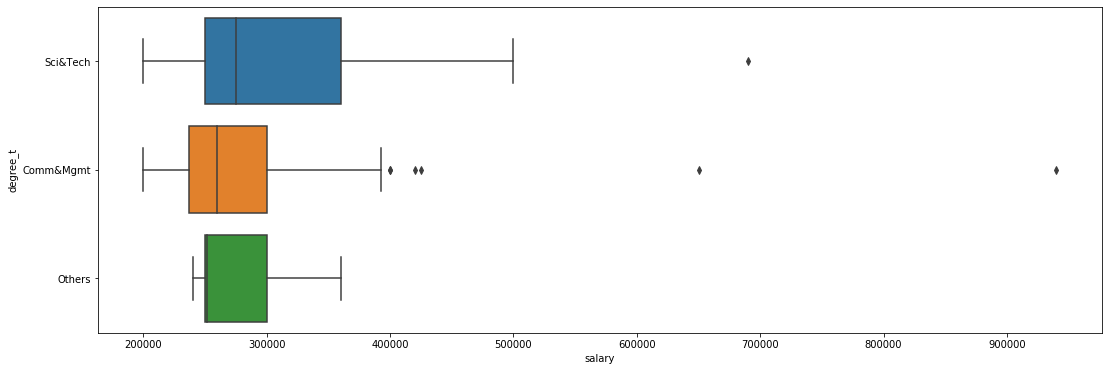

In [ ]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "degree_t", data=data)
plt.show()

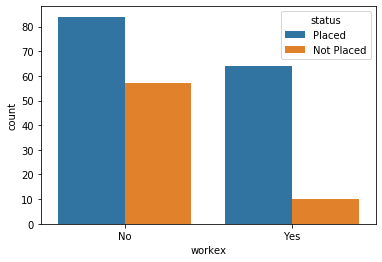

In [ ]:
sns.countplot("workex", hue="status", data=data)
plt.show()

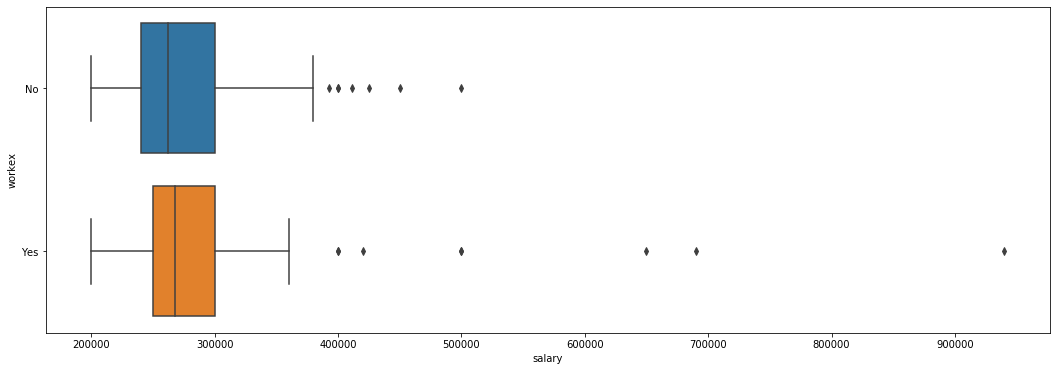

In [ ]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "workex", data=data)
plt.show()

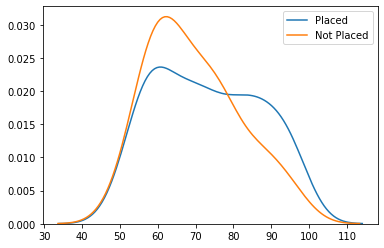

In [ ]:

sns.kdeplot(data.etest_p[ data.status=="Placed"])
sns.kdeplot(data.etest_p[ data.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.show()

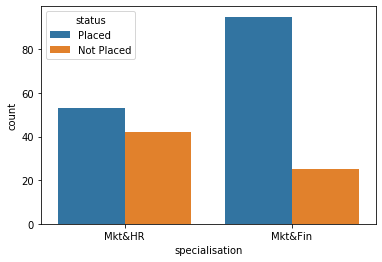

In [ ]:
sns.countplot("specialisation", hue="status", data=data)
plt.show()

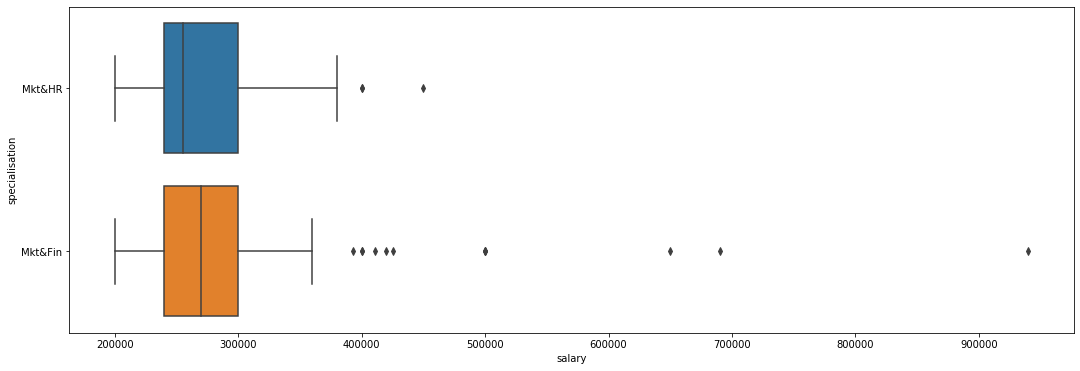

In [ ]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "specialisation", data=data)
plt.show()

### Data Pre-Processing

In [ ]:
data.drop(['ssc_b','hsc_b'],axis=1,inplace=True)

In [ ]:
data.dtypes

gender             object
ssc_p             float64
hsc_p             float64
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [ ]:
data["status"] = data.status.map({"Not Placed":0, "Placed":1})
# Categorical Variable
data["gender"] = data.gender.map({"M":0,"F":1})
data["hsc_s"] = data.hsc_s.map({"Commerce":0,"Science":1,"Arts":2})
data["degree_t"] = data.degree_t.map({"Comm&Mgmt":0,"Sci&Tech":1, "Others":2})
data["workex"] = data.workex.map({"No":0, "Yes":1})
data["specialisation"] = data.specialisation.map({"Mkt&HR":0, "Mkt&Fin":1})

### Predicting If Students gets placed or not (Binary Classification Problem)
### Predicting Salary of Student (Regression Problem)

In [ ]:
# Classification
df = data.copy()
# Regression
a = data.copy()

In [ ]:

X = df.drop(['status','salary'],axis=1)
y = df['status']

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.7906976744186046

In [ ]:
#Using Random Forest Algorithm
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.8372093023255814

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
y_pred = logistic_reg.predict(X_test)

/Users/apoorva/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [ ]:
accuracy_score(y_test, y_pred)

0.8153846153846154

### Predicting Salary

In [ ]:
## Data Preprocessing
a.dropna(inplace=True)
a.drop('status',axis=1)

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,0,67.00,91.00,0,58.00,1,0,55.00,0,58.80,270000.0
1,0,79.33,78.33,1,77.48,1,1,86.50,1,66.28,200000.0
2,0,65.00,68.00,2,64.00,0,0,75.00,1,57.80,250000.0
4,0,85.80,73.60,0,73.30,0,0,96.80,1,55.50,425000.0
7,0,82.00,64.00,1,66.00,1,1,67.00,1,62.14,252000.0
8,0,73.00,79.00,0,72.00,0,0,91.34,1,61.29,231000.0
10,0,58.00,61.00,0,60.00,0,1,62.00,0,60.85,260000.0
11,0,69.60,68.40,0,78.30,0,1,60.00,1,63.70,250000.0
13,1,77.00,87.00,0,59.00,0,0,68.00,1,68.63,218000.0
15,1,65.00,75.00,0,69.00,0,1,72.00,1,64.66,200000.0


In [ ]:
i= a.drop('salary',axis=1)
j = a['salary']

In [ ]:
i_scaled = scaler.fit_transform(i)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(i_scaled, j, test_size=0.3, random_state=0)

In [ ]:
model = DecisionTreeRegressor(criterion='mse')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
score = mse(y_test,y_pred)
score

19795977777.77778

In [ ]:
#Using Random Forest Algorithm
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

In [ ]:
score1=mse(y_test,y_pred)
score1

13531509171.11111